In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal
sns.set()

In [3]:
# Cell 2: Load cleaned datasets
benin = pd.read_csv('../data/benin-malanville_clean.csv', parse_dates=['Timestamp'])
sierra = pd.read_csv('../data/sierraleone-bumbuna_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo-dapaong_qc.csv', parse_dates=['Timestamp'])

# Add country label
benin['country'] = 'Benin'
sierra['country'] = 'Sierra Leone'
togo['country'] = 'Togo'

df = pd.concat([benin, sierra, togo], ignore_index=True)
df.shape

(1559809, 20)

In [4]:
# Cell 3: Summary table - mean, median, std of GHI, DNI, DHI
metrics = ['GHI','DNI','DHI']
summary = []
for country, g in df.groupby('country'):
    row = {'country': country}
    for m in metrics:
        row[f'{m}_mean'] = g[m].mean()
        row[f'{m}_median'] = g[m].median()
        row[f'{m}_std'] = g[m].std()
    summary.append(row)
summary_df = pd.DataFrame(summary).set_index('country').round(2)
summary_df

,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
country,,,,,,,,,
Benin,236.23,0.7,328.29,166.90,-0.1,262.08,111.66,0.5,153.10
Sierra Leone,223.86,0.5,317.31,147.98,0.0,247.68,112.78,1.5,151.57
Togo,230.56,2.1,322.53,151.26,0.0,250.96,116.44,2.5,156.52


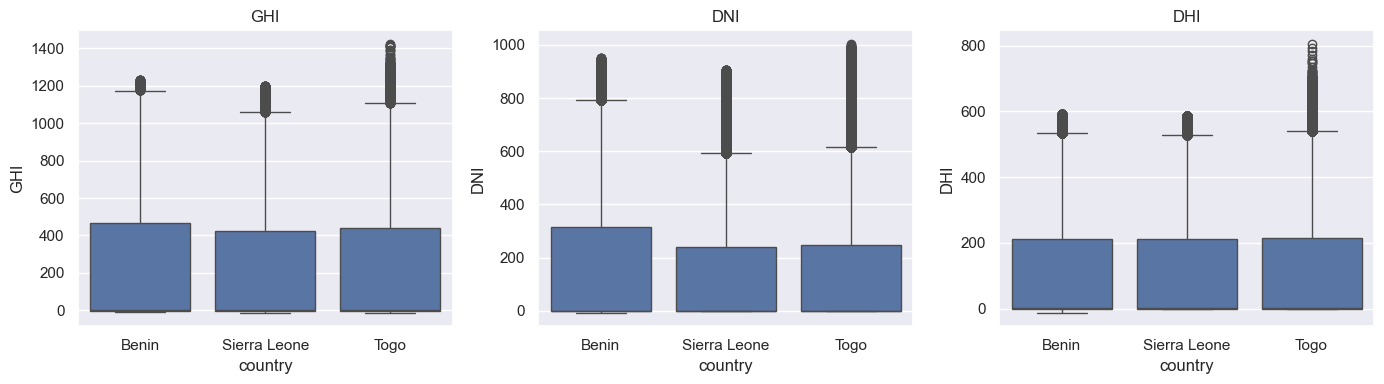

In [11]:
# Cell 4: Boxplots side-by-side
plt.figure(figsize=(14,4))
for i, m in enumerate(metrics, 1):
    plt.subplot(1,3,i)
    sns.boxplot(x='country', y=m, data=df)
    plt.title(m)
plt.tight_layout()
plt.show()

In [6]:
# Cell 5: ANOVA / Kruskal-Wallis test for GHI
groups = [g['GHI'].dropna().values for _, g in df.groupby('country')]
fstat, pval = f_oneway(*groups)
print('ANOVA F-statistic:', fstat, 'p-value:', pval)

# If non-normal / unequal variance -> Kruskal-Wallis
hstat, hpval = kruskal(*groups)
print('Kruskal-Wallis H-statistic:', hstat, 'p-value:', hpval)

ANOVA F-statistic: 190.47098726986215 p-value: 1.9480530758182453e-83
Kruskal-Wallis H-statistic: 217.002678908047 p-value: 7.559046135595164e-48


In [7]:
# Cell 6: Ranking by mean GHI
rank = summary_df[[f'{m}_mean' for m in metrics]].copy()
rank['GHI_mean_rank'] = rank['GHI_mean'].rank(ascending=False).astype(int)
rank.sort_values('GHI_mean_rank')

,GHI_mean,DNI_mean,DHI_mean,GHI_mean_rank
country,,,,
Benin,236.23,166.90,111.66,1
Togo,230.56,151.26,116.44,2
Sierra Leone,223.86,147.98,112.78,3


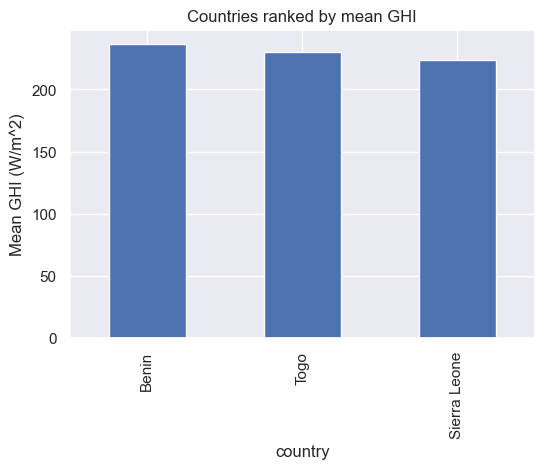

In [8]:
# Cell 7: Visual ranking bar chart
plt.figure(figsize=(6,4))
rankGHI = summary_df['GHI_mean'].sort_values(ascending=False)
rankGHI.plot(kind='bar')
plt.ylabel('Mean GHI (W/m^2)')
plt.title('Countries ranked by mean GHI')
plt.show()